In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df_bnb = pd.read_csv('Airbnb.csv')
df_bnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# Data Cleaning and Exploratory Data Analysis

#### Checking for null values in each column

In [3]:
df_bnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

#### There are a handful of columns in this dataset that are not necessary as they won't be used as part of any analysis. As such, they will be removed from the dataset.

In [4]:
df_bnb.drop(['name','id','host_name','last_review'],axis=1, inplace = True)

In [5]:
df_bnb.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [6]:
df_bnb.isnull().sum()

host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

#### Reviews per month still has a lot of null values, so we'll replace those NaN values with 0.

In [7]:
df_bnb.fillna({'reviews_per_month':0}, inplace = True)
df_bnb.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

#### Looking at the relationship between variables

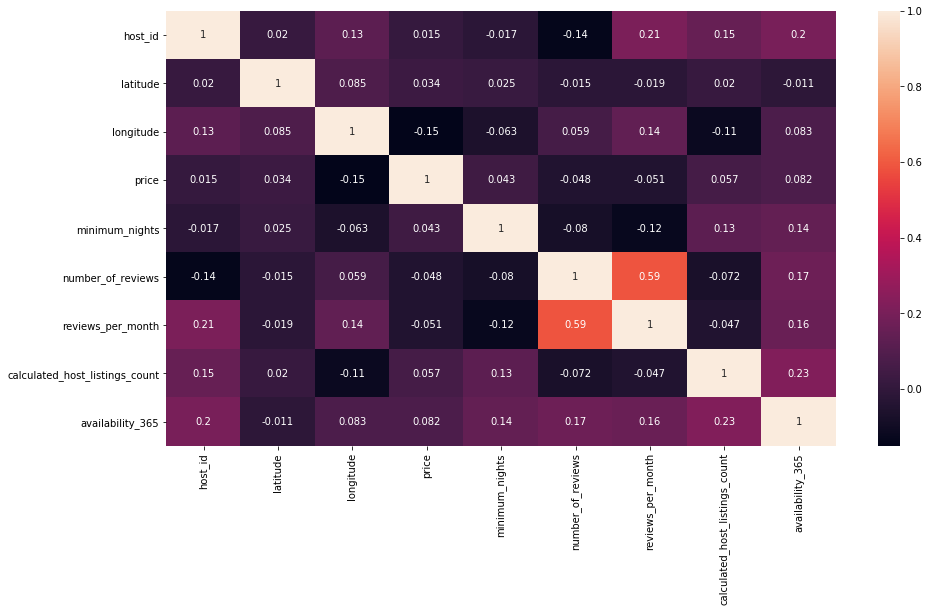

In [8]:
plt.figure(figsize=(15,8))
sns.heatmap(df_bnb.corr(),annot=True)

In [9]:
df_bnb['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

#### There are 5 neighbourhood groups listed in this dataset. Let's take a look at the price distribution across these groups and which group has the most rentals.

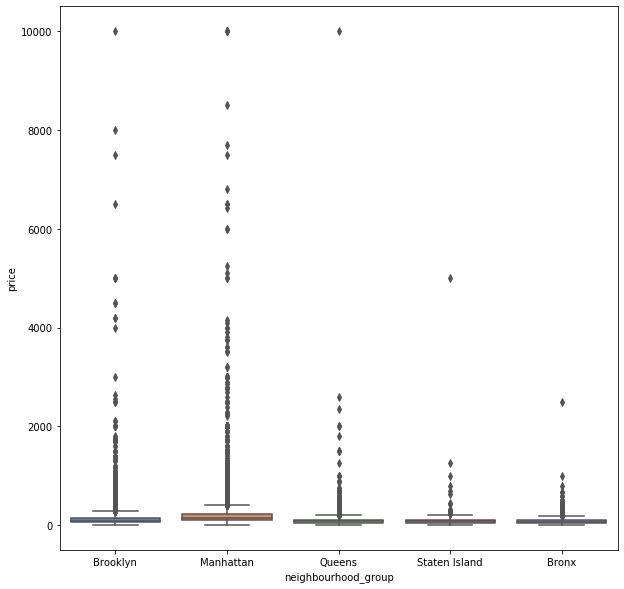

In [10]:
plt.figure(figsize=(10,10))
sns.boxplot(data = df_bnb, x = 'neighbourhood_group', y = 'price', palette = 'muted')

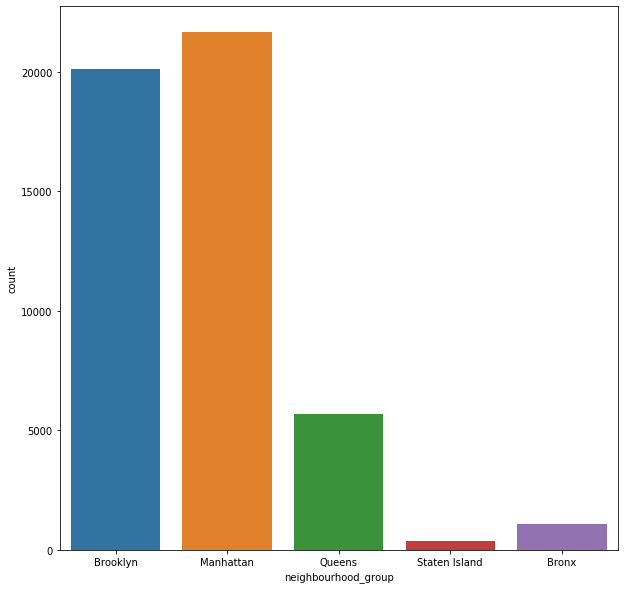

In [11]:
plt.figure(figsize = (10,10))
sns.countplot(df_bnb['neighbourhood_group'])

#### Manhattan has the most number of rentals, and the average prices of rentals in it are slightly higher than those in Brooklyn.

Text(0.5, 1.0, 'Room Distribution Across New York')

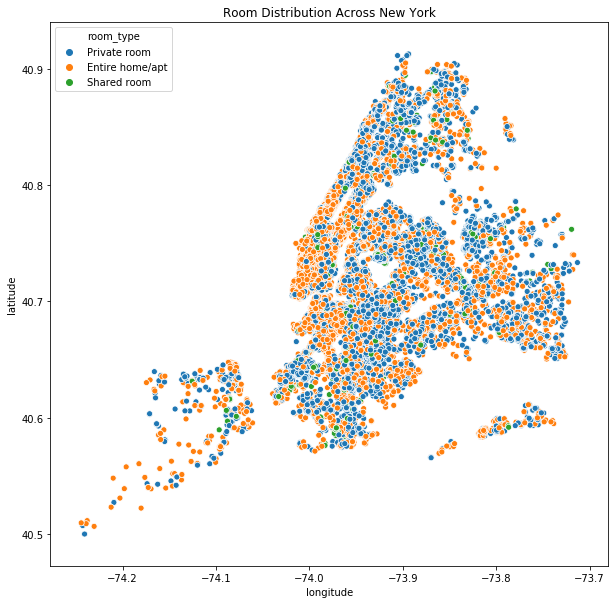

In [12]:
plt.figure(figsize = (10,10))
sns.scatterplot(df_bnb.longitude,df_bnb.latitude,hue=df_bnb.room_type)
plt.legend(loc = 'upper left')
plt.title('Room Distribution Across New York')

#### It appears that shared rooms are not very popular amongst people that list their properties for rental. In the event that someone wants to open up their house, they should take the type of room in to account. Let's check the availability of each of the room types.

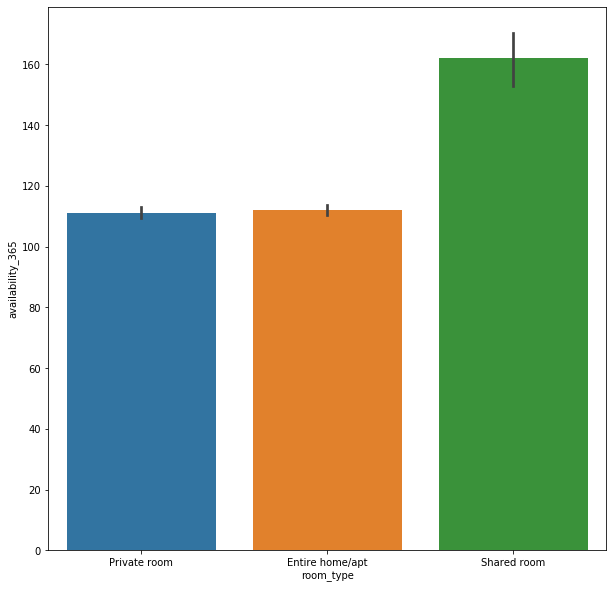

In [13]:
plt.figure(figsize = (10,10))
sns.barplot(data = df_bnb,x = 'room_type',y = 'availability_365')

#### Shared rooms seem to always be available, indicating that there is not much demand for such room types.




# Regression Analysis

As we move on to regression analysis, there are certain columns from the dataset that are no longer necessary. As such, they will be removed.

In [14]:
reg_bnb = df_bnb.copy()

In [15]:
reg_bnb.drop(['host_id','neighbourhood','latitude','longitude','number_of_reviews','reviews_per_month'],axis = 1, inplace = True)

Adding dummy variables for neighbourhood group and room type.

In [17]:
reg_bnb['neighbourhood_group'] = pd.get_dummies(df_bnb['neighbourhood_group'])
reg_bnb['room_type'] = pd.get_dummies(df_bnb['room_type'])

In [18]:
reg_bnb['neighbourhood_group'].head()

0    0
1    0
2    0
3    0
4    0
Name: neighbourhood_group, dtype: uint8

In [19]:
X = reg_bnb.drop('price', axis = 1)
y = reg_bnb['price']

### Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 300)

In [22]:
reg = LinearRegression()
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
r_score = r2_score(y_test,y_pred)

print('Coefficients: ', reg.coef_)
print('R Squared: ', r_score)
adjusted_r_squared = 1 - (1-r_score)*(len(y)-1)/(len(y)-X.shape[1]-1)
print('Adjusted R Square: ', adjusted_r_squared)

Coefficients:  [-5.72286705e+01  1.21972370e+02  1.55098041e-01  6.00017281e-02
  1.46366618e-01]
R Squared:  0.08960224758415636
Adjusted R Square:  0.08950913893472434


The coefficients suggest that owning an entire home relative to the other room types results in a price increase of upwards of $100.

### Decision Tree Regression

In [23]:
from sklearn.tree import DecisionTreeRegressor
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 210)
d_reg = DecisionTreeRegressor(min_samples_leaf = .0002)
d_reg.fit(x_train,y_train)
y_hat_tree = d_reg.predict(x_test)
r_score_tree = r2_score(y_test,y_hat_tree)

print('R squared: ', r_score_tree)

R squared:  0.04150188740536376


### Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state = 305)
reg_log = LogisticRegression(solver = 'liblinear', multi_class = 'auto')
reg_log.fit(x_train,y_train)
y_hat_log = reg_log.predict(x_test)
r_score_log = r2_score(y_test,y_hat_log)

print('R Squared: ', r_score_log)

R Squared:  0.015401988852568604


In [25]:
log_adj = 1 - (1-r_score_log)*(len(y)-1)/(len(y)-X.shape[1]-1)

print('R Squared: ', r_score_log)
print('Adjusted R Squared: ', log_adj)

R Squared:  0.015401988852568604
Adjusted R Squared:  0.01530129155755866


#### The r squared across the three regressions are all fairly low, but for predictive purposes I would recommend to a potential AirBnb renter to use the linear regressions coefficients when determining how to price their property.

## Now that we know that the best investment is to purchase an entire home, let's see if we can narrow it down to a specific neighborhood in the Manhattan borough.

In [34]:
manhattan = df_bnb[df_bnb['neighbourhood_group']=='Manhattan']

Text(0.5, 1.0, 'Room Distribution Across Manhattan')

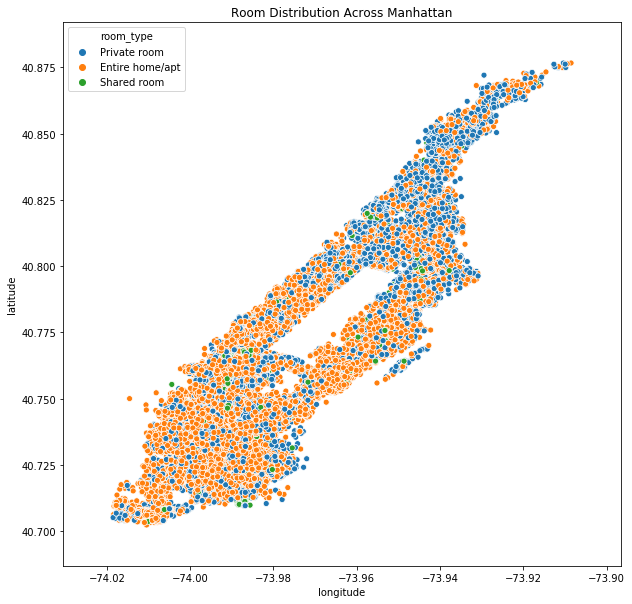

In [35]:
plt.figure(figsize = (10,10))
sns.scatterplot(manhattan.longitude,manhattan.latitude,hue=df_bnb.room_type)
plt.legend(loc = 'upper left')
plt.title('Room Distribution Across Manhattan')

Text(0.5, 1.0, "Neighbourhood's in Manhattan")

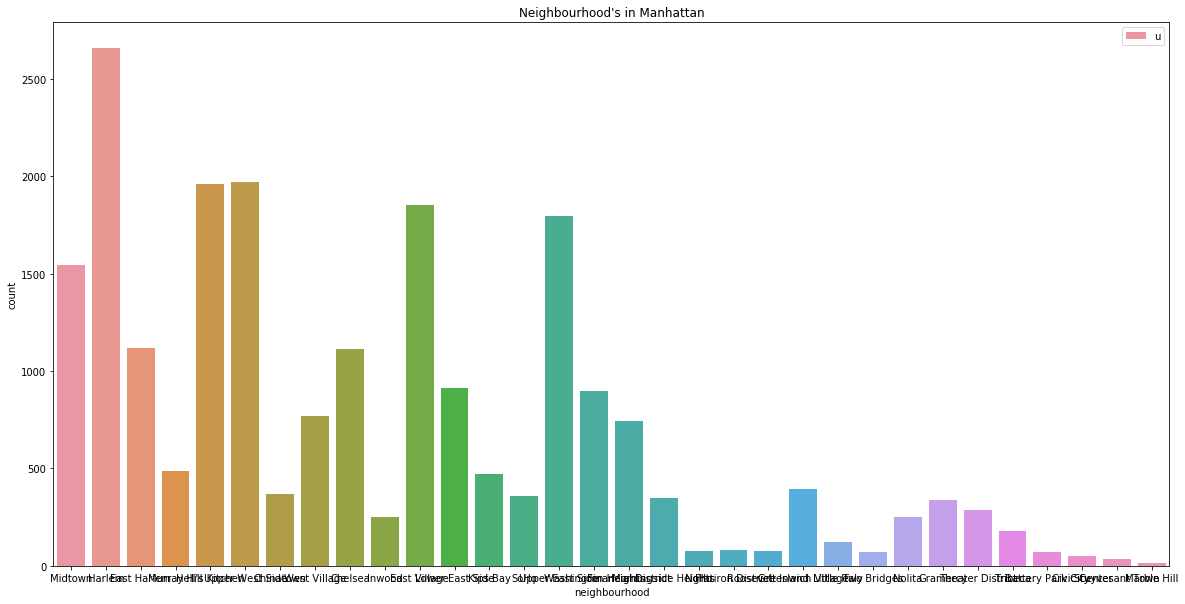

In [40]:
plt.figure(figsize = (20,10))
sns.countplot(manhattan['neighbourhood'])
plt.legend('upper right')
plt.title("Neighbourhood's in Manhattan")

There are too many neighbourhoods listed, so let's look at the top 5 to determine where to buy the rental property.

In [42]:
manhattan['neighbourhood'].value_counts().head()

Harlem             2658
Upper West Side    1971
Hell's Kitchen     1958
East Village       1853
Upper East Side    1798
Name: neighbourhood, dtype: int64

In [43]:
manhattan_5 = manhattan[manhattan['neighbourhood'].isin(['Harlem','Upper West Side', "Hell's Kitchen",'East Village'
                                                        ,'Upper East Side'])]

Text(0.5, 1.0, 'Top 5 neighbourhoods in Manhattan')

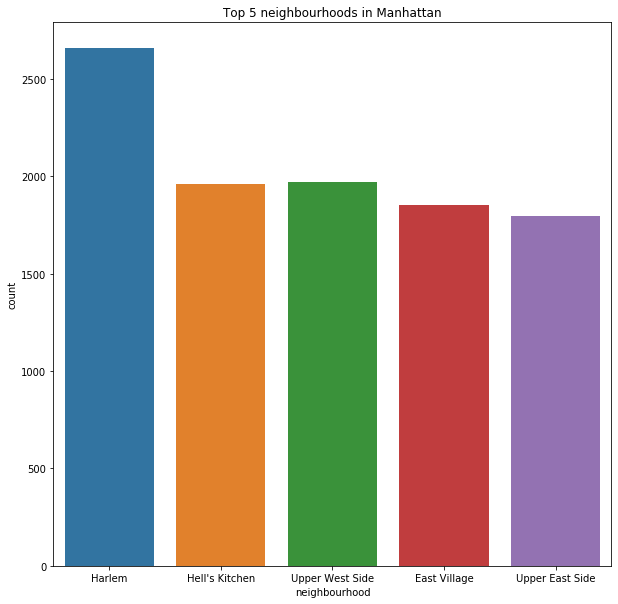

In [63]:
plt.figure(figsize = (10,10))
sns.countplot(manhattan_5['neighbourhood'])
plt.title('Top 5 neighbourhoods in Manhattan')

Now that we know that the top two neighbourhoods in Manhattan are Harlem and the Upper West Side, let's see if we can identify the effects of renting in one of these neighbourhoods.

In [48]:
manhattan_top_2 = manhattan_5[manhattan_5['neighbourhood'].isin(['Harlem', 'Upper West Side'])]

### I'm going to run a simple linear regression; with only 2 variables, a single dummy variable should be more effective for neighbourhood, while 'room_type' is still challenging as it contains 3 variables.

In [51]:
manhattan_top_2.drop(['host_id','neighbourhood_group','latitude','longitude','number_of_reviews','reviews_per_month'],
                   axis = 1, inplace = True)

In [54]:
manhattan_top_2['neighbourhood'] = pd.get_dummies(manhattan_top_2['neighbourhood'])
manhattan_top_2['room_type'] = pd.get_dummies(manhattan_top_2['room_type'])

C:\Users\karun\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\karun\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [55]:
manhattan_top_2

,neighbourhood,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
2,1,0,150,3,1,365
8,0,0,79,2,1,0
10,0,1,135,5,1,6
13,0,0,85,2,1,333
30,1,0,50,3,3,355
...,...,...,...,...,...,...
48849,1,1,65,1,1,32
48855,0,0,55,2,2,49
48871,1,0,35,29,2,31
48876,1,0,60,1,1,26


In [58]:
X  = manhattan_top_2.drop('price', axis = 1)
y = manhattan_top_2['price']

In [59]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = .4, random_state = 318)

In [60]:
manhattan_reg = LinearRegression()
manhattan_reg.fit(x_train, y_train)
y_pred = manhattan_reg.predict(x_test)
top_2_score = r2_score(y_test,y_pred)

print('R2 Score: ', top_2_score)
print('Coefficients: ', manhattan_reg.coef_)

R2 Score:  0.07456721496803431
Coefficients:  [-71.67992277 128.99411887  -0.13585938  -0.33836985   0.2443977 ]


#### Again the R^2 score is pretty low which indicates this linear regression is not a good predictor of price but we now know that purchasing a property to rent out in Harlem would decrease the price by approximately 72 dollars, meaning that we can now suggest to a potential buyer to purchase an entire home/apt in the Upper West Side of Manhattan to rent out to people on Airnbnb.